# Lab 2 numerical work
### Plot $\hat{P}(\hat{V})$, $\hat{G}(\hat{V})$, and $\hat{G}(\hat{P})$:

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

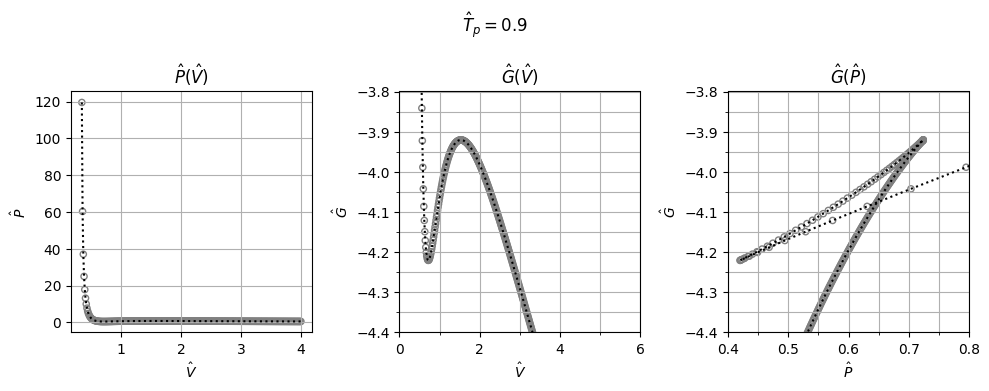

In [98]:
# Parameters
T_hat_b = 0.9  # boiling temperature
V_hat = np.linspace(0.35, 4, 300)  # V_hat >=  1/3, otherwise we get ln(negative number) in G_hat.

# Plotting parameters
scatter_size = 20
scatter_color = "gray"
plot_marker = "k:"

# Expressions
P_hat = 8 * T_hat_b / (3 * V_hat - 1) - 3 / V_hat**2
G_hat = -8 / 3 * T_hat_b * np.log(3 * V_hat - 1) - 3 / V_hat + P_hat * V_hat

fig, axs = plt.subplots(1, 3, figsize=(10, 6))
fig.suptitle("$\hat{T}_p=$" + str(T_hat_b), y=0.8)

# Plot P_hat(V_hat)
axs[0].scatter(V_hat, P_hat, scatter_size, color=scatter_color, facecolors="none")
axs[0].plot(V_hat, P_hat, plot_marker)
axs[0].set_xlabel("$\hat{V}$")
axs[0].set_ylabel("$\hat{P}$")
axs[0].set_title("$\hat{P}(\hat{V})$")
axs[0].xaxis.set_minor_locator(MultipleLocator(1))  # set minor grid yticks
# axs[0].yaxis.set_minor_locator(MultipleLocator(0.05))  # set minor grid yticks
axs[0].set_box_aspect(1)
axs[0].grid(True, which="both")

# Plot G_hat(V_hat):
axs[1].scatter(V_hat, G_hat, scatter_size, color=scatter_color, facecolors="none")
axs[1].plot(V_hat, G_hat, plot_marker)
axs[1].set_xlabel("$\hat{V}$")
axs[1].set_ylabel("$\hat{G}$")
axs[1].set_title("$\hat{G}(\hat{V})$")
axs[1].set_xlim(0, 6)
axs[1].set_ylim(-4.4, -3.8)
axs[1].xaxis.set_minor_locator(MultipleLocator(1))  # set minor grid xticks
axs[1].yaxis.set_minor_locator(MultipleLocator(0.05))  # set minor grid yticks
axs[1].set_box_aspect(1)
axs[1].grid(True, which="both")

# Plot G_hat(P_hat):
axs[2].scatter(P_hat, G_hat, scatter_size, color=scatter_color, facecolors="none")
axs[2].plot(P_hat, G_hat, plot_marker)
axs[2].set_xlabel("$\hat{P}$")
axs[2].set_ylabel("$\hat{G}$")
axs[2].set_title("$\hat{G}(\hat{P})$")
axs[2].set_xlim(0.4, 0.8)
axs[2].set_ylim(-4.4, -3.8)
axs[2].xaxis.set_minor_locator(MultipleLocator(0.05))  # set minor grid xticks
axs[2].yaxis.set_minor_locator(MultipleLocator(0.05))  # set minor grid yticks
axs[2].set_box_aspect(1)  # make plot square 
axs[2].grid(True, which="both")

plt.tight_layout()

### Determine the coexistance line numerically:

From the above plot we see that $G_l=G_g$ at around $\hat{G}=-4.08$ which happens at around $\hat{P}=0.64$. I will now loop over different $\hat{T}_p$ values and note each $\hat{P}=0.64$ value where $G_l=G_g$:

In [ ]:
# Parameters
T_hat_b_list = np.arange(0.3, 1.1, 0.1)  # boiling temperature
V_hat = np.linspace(0.35, 4, 300)  # V_hat >=  1/3, otherwise we get ln(negative number) in G_hat.
xlims = [
    (-9, -5),
    (-10, 0),
    (-8, 0),
    (-8, 1),
    (-5, 2),
    (-5, 5),
    (-5, 8),
    (-5, 10),
]
ylims = [
    (-9.5, -9),
    (-10, -5),
    (-8, -5),
    (-8, -5),
    (-8, -5),
    (-8, -5),
    (-8, -5),
    (-8, -5),
]

# Plotting parameters
scatter_size = 20
scatter_color = "gray"
plot_marker = "k:"
nrows = 2
ncols = 4
fig, axs = plt.subplots(nrows, ncols, figsize=(10, 6))
fig.suptitle("$\hat{G}(\hat{P})$ of different $\hat{T}_b$ values")

i = 0
j = 0
for k, T_hat_b in enumerate(T_hat_b_list):
    if j >= ncols:
        i += 1
        j = 0

    # Expressions
    P_hat = 8 * T_hat_b / (3 * V_hat - 1) - 3 / V_hat**2
    G_hat = -8 / 3 * T_hat_b * np.log(3 * V_hat - 1) - 3 / V_hat + P_hat * V_hat

    # Plot G_hat(P_hat):
    axs[i, j].scatter(P_hat, G_hat, scatter_size, color=scatter_color, facecolors="none")
    axs[i, j].plot(P_hat, G_hat, plot_marker)
    axs[i, j].set_xlabel("$\hat{P}$")
    axs[i, j].set_ylabel("$\hat{G}$")
    axs[i, j].set_title("$\hat{T}_p=$" + f"{T_hat_b:.1f}")
    # x0, x1 = xlims[k]
    # y0, y1 = ylims[k]
    # axs[i, j].set_xlim(x0, x1)
    # axs[i, j].set_ylim(y0, y1)
    # axs[i, j].xaxis.set_minor_locator(MultipleLocator(0.05))  # set minor grid xticks
    # axs[i, j].yaxis.set_minor_locator(MultipleLocator(0.05))  # set minor grid yticks
    axs[i, j].grid(True, which="both")

    j += 1

plt.tight_layout()